In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("cleaned_data.csv")

In [2]:
data.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Company,Mileage(km/kg),Engine(CC),Power(bhp),New_car_Price
0,Mumbai,2010,72000,CNG,Manual,First,5.0,1.75,Maruti,26.60,998.0,58.16,NaN
1,Pune,2015,41000,Diesel,Manual,First,5.0,12.50,Hyundai,19.67,1582.0,126.20,NaN
2,Chennai,2011,46000,Petrol,Manual,First,5.0,4.50,Honda,18.20,1199.0,88.70,8.61
3,Chennai,2012,87000,Diesel,Manual,First,7.0,6.00,Maruti,20.77,1248.0,88.76,NaN
4,Coimbatore,2013,40670,Diesel,Automatic,Second,5.0,17.74,Audi,15.20,1968.0,140.80,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5872 entries, 0 to 5871
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           5872 non-null   object 
 1   Year               5872 non-null   int64  
 2   Kilometers_Driven  5872 non-null   int64  
 3   Fuel_Type          5872 non-null   object 
 4   Transmission       5872 non-null   object 
 5   Owner_Type         5872 non-null   object 
 6   Seats              5872 non-null   float64
 7   Price              5872 non-null   float64
 8   Company            5872 non-null   object 
 9   Mileage(km/kg)     5872 non-null   float64
 10  Engine(CC)         5872 non-null   float64
 11  Power(bhp)         5872 non-null   float64
 12  New_car_Price      823 non-null    float64
dtypes: float64(6), int64(2), object(5)
memory usage: 596.5+ KB


In [4]:
data['Price'].describe()

count    5872.000000
mean        9.603919
std        11.249453
min         0.440000
25%         3.517500
50%         5.750000
75%        10.000000
max       160.000000
Name: Price, dtype: float64

(0, 160)

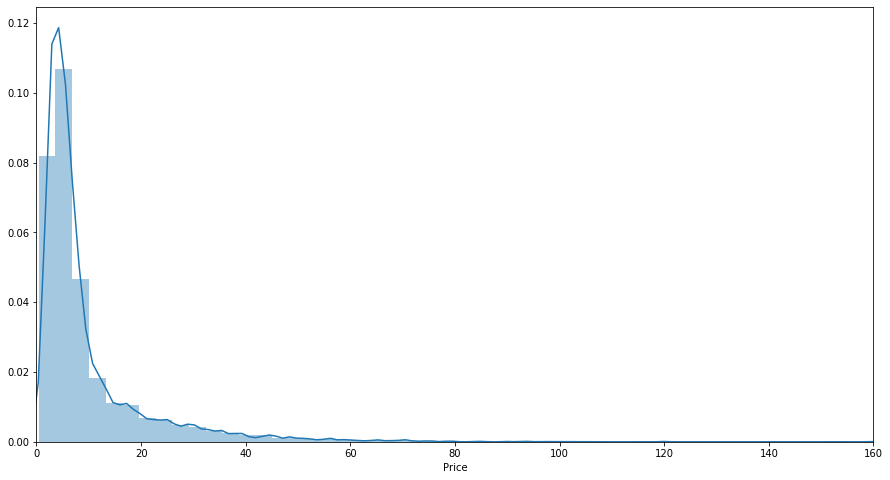

In [5]:
figure, ax = plt.subplots(figsize = (15,8))
sns.distplot(data['Price'])
plt.xlim([0,160])

In [6]:
data['Fuel_Type'].describe()

count       5872
unique         4
top       Diesel
freq        3152
Name: Fuel_Type, dtype: object

(-0.5, 3.5, 0, 165)

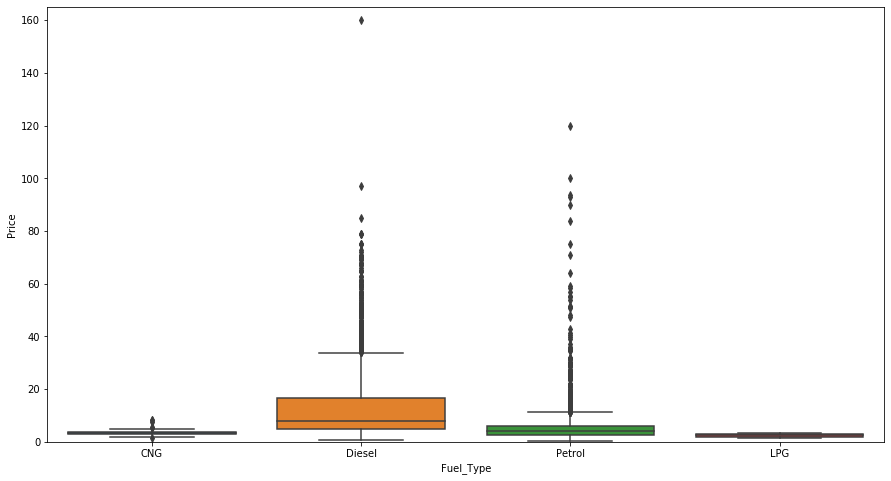

In [7]:
df = pd.concat([data['Price'], data['Fuel_Type']], axis = 1)
fig, ax = plt.subplots(figsize = (15,8))
figure = sns.boxplot(x = 'Fuel_Type', y = 'Price', data = df)
figure.axis(ymin = 0, ymax = 165)

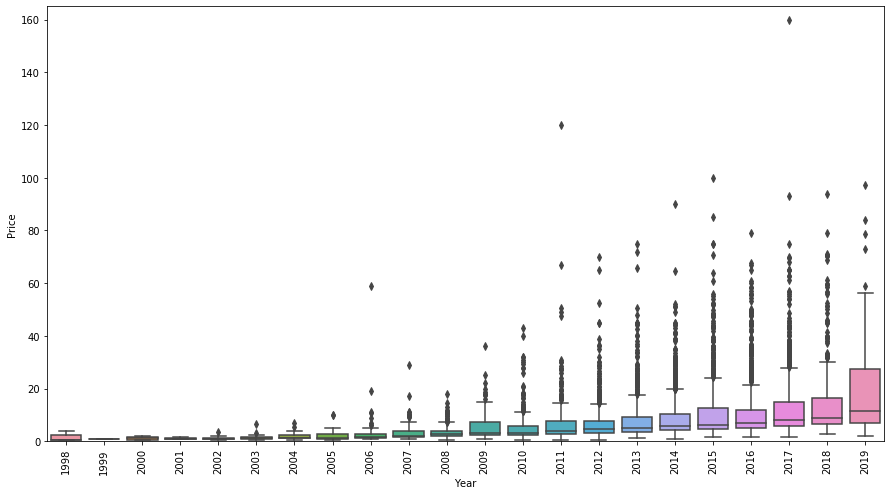

In [8]:
fig, ax = plt.subplots(figsize = (15,8))
figure = sns.boxplot(x = 'Year', y = 'Price', data = data)
figure.axis(ymin = 0, ymax = 165)
plt.xticks(rotation = 90);

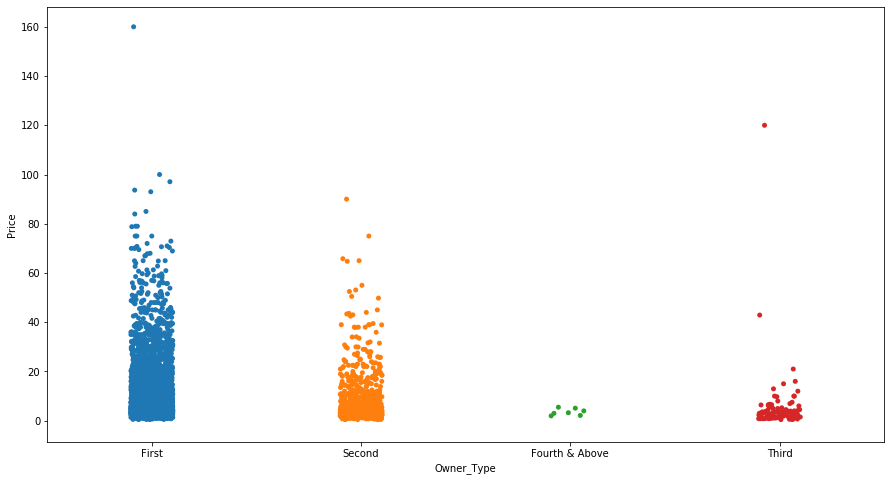

In [9]:
fig, ax = plt.subplots(figsize = (15,8))
sns.stripplot( x = 'Owner_Type', y='Price', data = data)

<Figure size 1440x720 with 0 Axes>

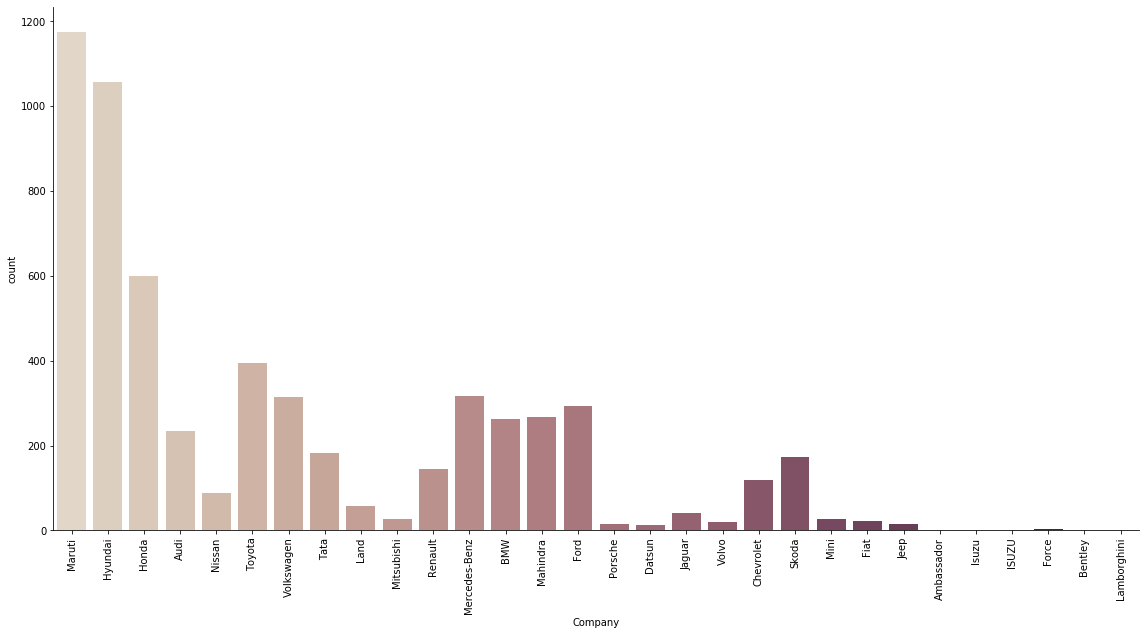

In [10]:
plt.figure(figsize = (20,10))
sns.catplot(x = 'Company', kind='count', palette='ch:.25', height=8, aspect = 2, data = data);
plt.xticks(rotation = 90);

# Working with Categorical Data
As for now we have left with only 5 categorical features:

1. Location
2. Fuel_Type
3. Transmission
4. Owner_Type
5. Company

For hadeling categorical data. We modtly use these 2 path:

1. OneHotEncoder
2. LabelEncoder

Where OneHotEncoder is used where data are not in any order and LabelEncoder when data is in order.

So, for each Features we will use plots to find out what to be used there.

In [11]:
data['Location'].value_counts()

Mumbai        775
Hyderabad     718
Kochi         645
Coimbatore    629
Pune          594
Delhi         545
Kolkata       521
Chennai       476
Jaipur        402
Bangalore     347
Ahmedabad     220
Name: Location, dtype: int64

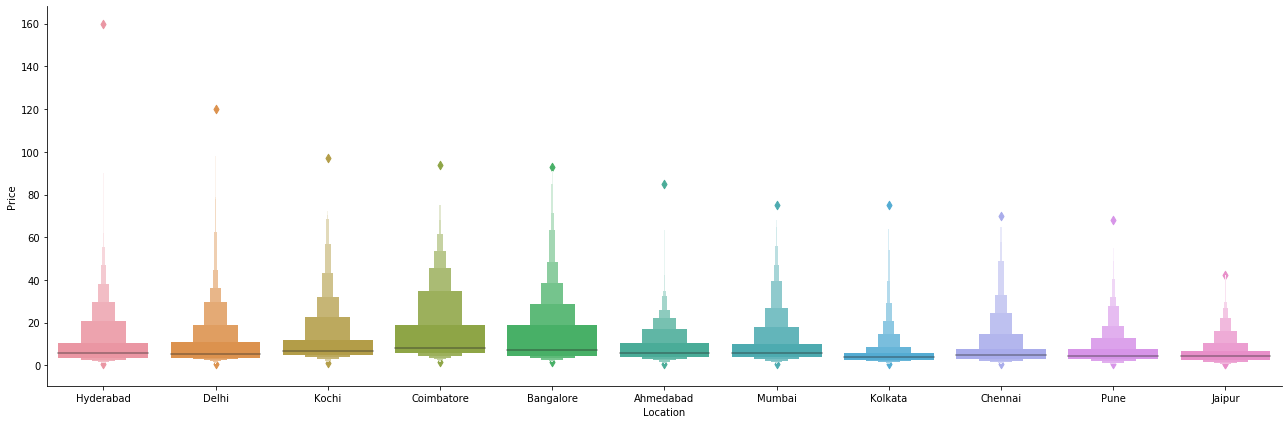

In [12]:
sns.catplot(x = 'Location', y = 'Price', data = data.sort_values('Price', ascending = False), kind = 'boxen', height = 6, aspect= 3)
plt.show()

In [13]:
Location = data[['Location']]
Location = pd.get_dummies(Location, drop_first = True)
Location

,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
5867,0,0,0,1,0,0,0,0,0,0
5868,0,0,0,0,0,1,0,0,0,0
5869,0,0,0,0,0,1,0,0,0,0
5870,0,0,0,0,0,0,0,1,0,0


In [14]:
data['Fuel_Type'].value_counts()

Diesel    3152
Petrol    2655
CNG         55
LPG         10
Name: Fuel_Type, dtype: int64

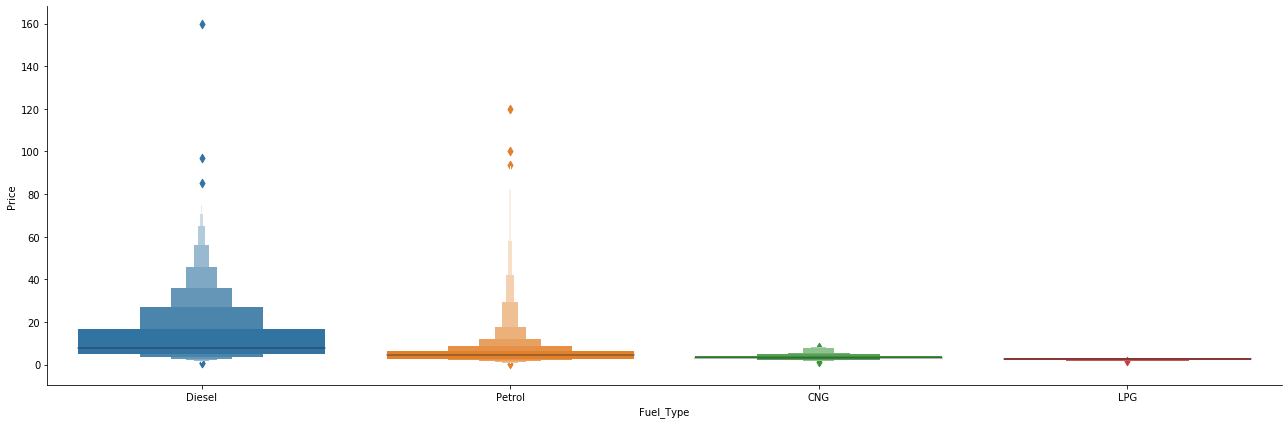

In [15]:
sns.catplot(x = 'Fuel_Type', y = 'Price', data = data.sort_values('Price', ascending = False), kind = 'boxen', height = 6, aspect = 3)
plt.show()

In [16]:
Fuel_t = data[['Fuel_Type']]
Fuel_t = pd.get_dummies(Fuel_t, drop_first = True)
Fuel_t.head()

,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol
0,0,0,0
1,1,0,0
2,0,0,1
3,1,0,0
4,1,0,0


In [17]:
data['Transmission'].value_counts()

Manual       4170
Automatic    1702
Name: Transmission, dtype: int64

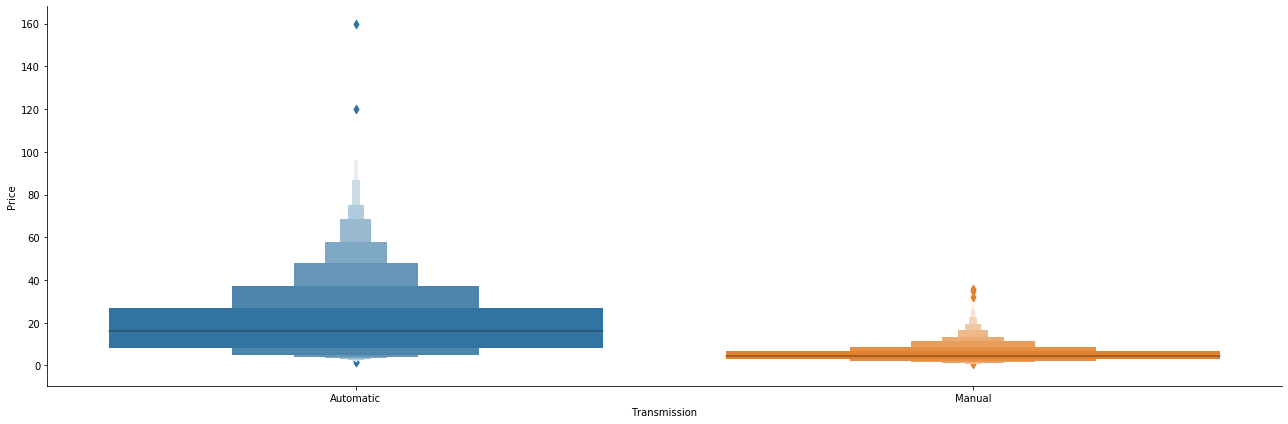

In [18]:
sns.catplot(x = 'Transmission', y= 'Price', data = data.sort_values('Price', ascending = False), kind = 'boxen', height = 6, aspect = 3)
plt.show()

In [19]:
Transmission = data[['Transmission']]
Transmission = pd.get_dummies(Transmission, drop_first = True)
Transmission.head()

,Transmission_Manual
0,1
1,1
2,1
3,1
4,0


In [20]:
data['Owner_Type'].value_counts()

First             4839
Second             925
Third              101
Fourth & Above       7
Name: Owner_Type, dtype: int64

In [21]:
data.replace({"First": 1, "Second": 2, "Third": 3, "Fourth & Above": 4}, inplace = True)
data.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Company,Mileage(km/kg),Engine(CC),Power(bhp),New_car_Price
0,Mumbai,2010,72000,CNG,Manual,1,5.0,1.75,Maruti,26.60,998.0,58.16,NaN
1,Pune,2015,41000,Diesel,Manual,1,5.0,12.50,Hyundai,19.67,1582.0,126.20,NaN
2,Chennai,2011,46000,Petrol,Manual,1,5.0,4.50,Honda,18.20,1199.0,88.70,8.61
3,Chennai,2012,87000,Diesel,Manual,1,7.0,6.00,Maruti,20.77,1248.0,88.76,NaN
4,Coimbatore,2013,40670,Diesel,Automatic,2,5.0,17.74,Audi,15.20,1968.0,140.80,NaN


In [22]:
data['Company'].value_counts()

Maruti           1175
Hyundai          1058
Honda             600
Toyota            394
Mercedes-Benz     316
Volkswagen        314
Ford              294
Mahindra          268
BMW               262
Audi              235
Tata              183
Skoda             172
Renault           145
Chevrolet         120
Nissan             89
Land               57
Jaguar             40
Mitsubishi         27
Mini               26
Fiat               23
Volvo              21
Porsche            16
Jeep               15
Datsun             13
Force               3
ISUZU               2
Isuzu               1
Lamborghini         1
Ambassador          1
Bentley             1
Name: Company, dtype: int64

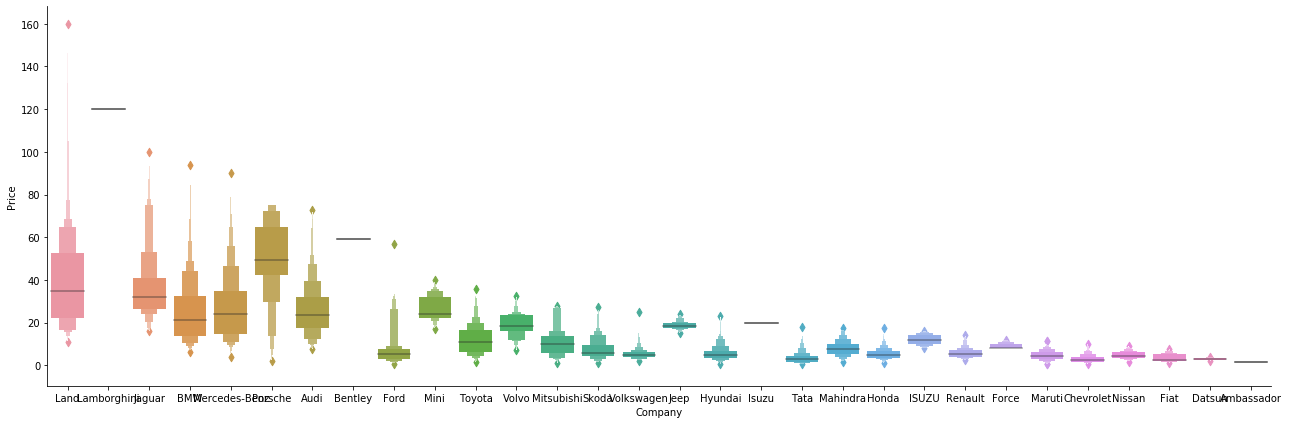

In [23]:
sns.catplot(x = 'Company', y='Price', data = data.sort_values('Price', ascending = False), kind = 'boxen', height= 6, aspect = 3)
plt.show()

In [24]:
data.drop(['Company'], axis = 1, inplace = True)

In [25]:
final_train = pd.concat([data, Location, Fuel_t, Transmission], axis = 1)
final_train.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Mileage(km/kg),Engine(CC),...,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,Mumbai,2010,72000,CNG,Manual,1,5.0,1.75,26.60,998.0,...,0,0,0,0,1,0,0,0,0,1
1,Pune,2015,41000,Diesel,Manual,1,5.0,12.50,19.67,1582.0,...,0,0,0,0,0,1,1,0,0,1
2,Chennai,2011,46000,Petrol,Manual,1,5.0,4.50,18.20,1199.0,...,0,0,0,0,0,0,0,0,1,1
3,Chennai,2012,87000,Diesel,Manual,1,7.0,6.00,20.77,1248.0,...,0,0,0,0,0,0,1,0,0,1
4,Coimbatore,2013,40670,Diesel,Automatic,2,5.0,17.74,15.20,1968.0,...,0,0,0,0,0,0,1,0,0,0


In [26]:
final_train.drop(["Location", "Fuel_Type", "Transmission", "New_car_Price"], axis = 1, inplace = True)
final_train.head()

,Year,Kilometers_Driven,Owner_Type,Seats,Price,Mileage(km/kg),Engine(CC),Power(bhp),Location_Bangalore,Location_Chennai,...,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,2010,72000,1,5.0,1.75,26.60,998.0,58.16,0,0,...,0,0,0,0,1,0,0,0,0,1
1,2015,41000,1,5.0,12.50,19.67,1582.0,126.20,0,0,...,0,0,0,0,0,1,1,0,0,1
2,2011,46000,1,5.0,4.50,18.20,1199.0,88.70,0,1,...,0,0,0,0,0,0,0,0,1,1
3,2012,87000,1,7.0,6.00,20.77,1248.0,88.76,0,1,...,0,0,0,0,0,0,1,0,0,1
4,2013,40670,2,5.0,17.74,15.20,1968.0,140.80,0,0,...,0,0,0,0,0,0,1,0,0,0


In [27]:
final_train.to_csv("train_dataset.csv", index = False)

## Prepare Test Data

In [32]:
test_data = pd.read_csv("./dataset/test-data.csv")
test_data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN


In [33]:
test_data = test_data.iloc[:,1:]
    
print("Shape of test data Before dropping any Row: ", data.shape)
test_data = test_data[test_data['Mileage'].notna()]
print("Shape of test data After dropping Rows with NULL values in Mileage: ", test_data.shape)
test_data = test_data[test_data['Engine'].notna()]
print("Shape after dropping NULL values rows in Engine: ", test_data.shape)
test_data = test_data[test_data['Power'].notna()]
print("Shape after dropping NULL values rows in Power: ", test_data.shape)
test_data = test_data[test_data['Seats'].notna()]
print("Shape after dropping NULL values rows in Seats: ", test_data.shape)
print("************")
print('Dropping null done')
print("************")

test_data = test_data.reset_index(drop = True)
print("Index reset done")

for i in range(test_data.shape[0]):
    test_data.at[i, 'Mileage(km/kg)'] = test_data['Mileage'][i].split()[0]
    test_data.at[i, 'Engine(CC)'] = test_data['Engine'][i].split()[0]
    test_data.at[i, 'Power(bhp)'] = test_data['Power'][i].split()[0]
print('Split Done')

test_data['Mileage(km/kg)'] = test_data['Mileage(km/kg)'].astype(float)
test_data['Engine(CC)'] = test_data['Engine(CC)'].astype(float)
print('Casting1 Done')

position = []
for i in range(test_data.shape[0]):
    if test_data['Power(bhp)'][i] == 'null':
        position.append(i)

test_data = test_data.drop(test_data.index[position])
test_data = test_data.reset_index(drop = True)

test_data['Power(bhp)'] = test_data['Power(bhp)'].astype(float)
print('Casting2 done')

for i in range(test_data.shape[0]):
    if pd.isnull(test_data.loc[i,'New_Price']) == False:
        test_data.at[i,'New_car_Price'] = test_data['New_Price'][i].split()[0]

test_data['New_car_Price'] = test_data['New_car_Price'].astype(float)

test_data.drop(["Name"],axis=1,inplace=True)
test_data.drop(["Mileage"],axis=1,inplace=True)
test_data.drop(["Engine"],axis=1,inplace=True)
test_data.drop(["Power"],axis=1,inplace=True)
test_data.drop(["New_Price"],axis=1,inplace=True)

Location = test_data[['Location']]
Location = pd.get_dummies(Location,drop_first=True)
Location.head()

Fuel_t = test_data[['Fuel_Type']]
Fuel_t = pd.get_dummies(Fuel_t,drop_first=True)
Fuel_t.head()

Transmission = test_data[['Transmission']]
Transmission = pd.get_dummies(Transmission,drop_first=True)
Transmission.head()

test_data.replace({"First":1,"Second":2,"Third": 3,"Fourth & Above":4},inplace=True)
test_data.head()

final_test= pd.concat([test_data,Location,Fuel_t,Transmission],axis=1)
final_test.head()

final_test.drop(["Location","Fuel_Type","Transmission","New_car_Price"],axis=1,inplace=True)

print("Final Test Size: ",final_test.shape)

Shape of test data Before dropping any Row:  (5872, 12)
Shape of test data After dropping Rows with NULL values in Mileage:  (1234, 12)
Shape after dropping NULL values rows in Engine:  (1224, 12)
Shape after dropping NULL values rows in Power:  (1224, 12)
Shape after dropping NULL values rows in Seats:  (1223, 12)
************
Dropping null done
************
Index reset done
Split Done
Casting1 Done
Casting2 done
Final Test Size:  (1201, 21)


In [34]:
final_test.head()

,Year,Kilometers_Driven,Owner_Type,Seats,Mileage(km/kg),Engine(CC),Power(bhp),Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,2014,40929,1,4.0,32.26,998.0,58.20,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2013,54493,2,5.0,24.70,796.0,47.30,0,0,1,...,0,0,0,0,0,0,0,0,1,1
2,2017,34000,1,7.0,13.68,2393.0,147.80,0,0,0,...,0,0,0,0,1,0,1,0,0,1
3,2014,29000,1,5.0,18.50,1197.0,82.85,0,0,0,...,0,0,0,0,1,0,0,0,1,1
4,2016,85609,2,7.0,16.00,2179.0,140.00,0,0,1,...,0,0,0,0,0,0,1,0,0,1


In [35]:
final_test.to_csv('final_test_dataset.csv', index = False)